# [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)
by Aurélien Géron

## Chapter 1 - The Machine Learning Landscape

### Types of Machine Learning Systems

#### Supervised Learning 
- The training set you feed the model includes the desired solutions, called `labels`.
- `Classification` - A supervised learning task where a model is trained with many examples that include their `class`. It learns how to classify new instances.
- `Regression` - A supervised learning task where the model's task is to predict a `target` numeric value given a set of `features`.
- `Classification` and `regression` can be used together. For example, `logistic regression` is commonly used for `classification`.

#### Unsupervised Learning
- The model trains on `unlabeled` data.
- `Clustering` - Algorithm to detect groups and find connections between the data. `Hierarchical Clustering` may also subdivide groups into smaller groups.
- `Visualization` - Algorithms that outputs 2D or 3D representations of data.
- `Dimensionality Reduction` - Simplify the data without losing too much information. One way is to merge correlated `features`, called `feature extraction`.
- `Anomaly/Novelty Detection` - Trained mostly on very similar instances and then detects outliers that look different from thet training set.
- `Association Rule Learning` - Discover relations between attributes.

#### Semi-supervised Learning
- Often has lots of `unlabeled` data, and few `labeled` instances. Often time-consuming and costly.
- Can use combinations of `unsupervised` and `supervised` algorithms.

#### Self-supervised Learning
- Involves generating a fully `labeled` dataset from a fully `unlabeled` one.
- Once the dataset is `labeled`, `supervised` algorithms can be used.

#### Reinforcement Learning
- The `agent` learning system can observe the environment, perform actions, and get rewards or penalties.
- It must learn by itself the best strategy (called a `policy`) to get the most rewards over time.

### Batch vs Online Learning

#### Offline/Batch Learning
- It must be trained using all available data. Incapable of learning incrementally.
- Also called `offline learning`.
- If it needs to be changed or learn on the latest dataset, the whole system has to be re-trained from scratch.

#### Online/Incremental Learning
- Trained incrementally by feeding instances sequentially or in small batches (`mini-batches`).
- Can learn and update itself on the fly as new data arrives.
- Can be used for `out-of-core` learning by loading chunks of huge datasets and training on each of them until it works through all the data. This typically happens offline, but is incremental.
- `Learning rate` determines how fast it should adapt to changing data.

### Instance-based vs Model-based Learning
Another machine learning category is by how they `generalize`.

#### Instance-based Learning

- The model learns examples by heart, then generalizes to new cases by using a `measure of similarity` that it develops.

#### Model-based Learning

- Builds a model of examples and then uses that model to make `predictions`.
- The `model selection` is critical in order to make accurate `predections`.
- Can define either a `fitness function` to measure how good the model is or a `cost function` that measures how bad it is.
- `Linear Regression` typically uses a `cost function` to find the linear model that best fits the data.

### Main Challenges of Machine Learning
- Insufficient Quantity of Training Data
- Nonrepresentative Training Data - `sampling noise` from samples that are too small. But even big samples can be bad from `sampling bias`.
- Poor Quality Data - Data that has errors, outliers, etc.
- Irrelevant Features - `Feature engineering` involves selecting the most relevant features via `feature selection` and `feature extraction`. Or finding new features from new data.
- Overfitting - Performs well on training data but does not generalize well. Model is too complex relative to the amount and noisiness of the training data.
  - `Regularization` reduces the risk of overfitting by simplifying the model. Can utilize `hyperparameters` that are constant constraints on the learning algorithm.
- Underfitting - Model is too simple to learn the underlying structure of the data.

### Testing and Validating
- Split data into two sets: the `training set` and the `testing set`.
- The error rate on new cases is called the `generalization error` or `out-of-sample error`

#### Hyperparameter Tuning and Model Selection
- A common problem in testing is that same `testing set` is used repeatedly to measure the `generalization error` and tweak the model and `hyperparameters`. This only trains the model specifically for the `testing set` and when launched in production it can have a drastically higher `generalization error`.
- `Holdout validation` is a common solution.
  - Pull a set of data out of the `training set`, called the `validation set` (`dev set`).
  - Train multiple models on the `training set` and select the model that performs best on the `dev set`.
  - Then train the best model on the full `training set` (including the `dev set`).
  - Evaluate the final model on the `testing set`.
  - `Cross-validation` uses multiple small `dev sets`.

#### Data Mismatch
- Happens when it is hard to get a reliable `training set` representative of the data that will be in production.
- The `training set` can have a small `train-dev set` broken off that is used to evaluate the model before the `dev set`.
- If the `train-dev set` has problems, it is likely the model is overfitting. If the `dev set` has problems, it is a data mismatch.

In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk

In [2]:
# configuration
pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 2)

linear regression prediction: [[6.30165767]]
kneighbors prediction: [[6.26]]


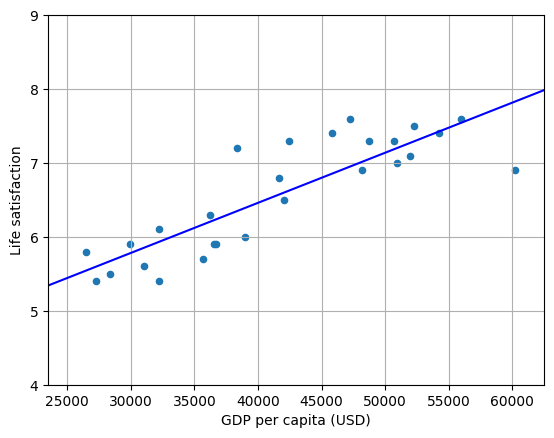

In [3]:
ageron_github_url = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(ageron_github_url + "lifesat/lifesat.csv")

# predict life satisfaction using GDP
x = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values
gdp = [[37655.2]]

lr_model = sk.linear_model.LinearRegression()
lr_model.fit(x, y)
print("linear regression prediction:", lr_model.predict(gdp))

kn_model = sk.neighbors.KNeighborsRegressor()
kn_model.fit(x, y)
print ("kneighbors prediction:", kn_model.predict(gdp))

# visualize
min_gdp = 23_500
max_gdp = 62_500
lifesat.plot(kind='scatter', grid=True, x="GDP per capita (USD)", y="Life satisfaction")
t0, t1 = lr_model.intercept_[0], lr_model.coef_.ravel()[0]
X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t0 + t1 * X, "b")
plt.axis([min_gdp, max_gdp, 4, 9])
plt.show()